In [1]:
from DataLoader import *
from Visualization import *
from EstimateFundamentalMatrix import *
from EssentialMatrixFromFundamentalMatrix import *
from GetInliersRANSAC import *
from ExtractCameraPose import *
from LinearTriangulation import *
from DisambiguateCameraPose import *
import os

# Don't generate pyc codes
sys.dont_write_bytecode = True

In [2]:
dataDirPath = os.getcwd() + '/P3Data/'
images = loadImages(dataDirPath)
# displayImages(images, 5)


In [3]:
K = getCameraParams(dataDirPath)
print(K)

[[531.12215532   0.         407.19255084]
 [  0.         531.5417375  313.30871505]
 [  0.           0.           1.        ]]


In [4]:
featureMatchesList = parseMatchFiles(dataDirPath)

In [5]:
InlierList, OutlierList = ransac(featureMatchesList[0].matchPairs, 2000, 0.02)
matchPairsInliers = [featureMatchesList[0].matchPairs[i] for i in InlierList]
matchPairsOutliers = [featureMatchesList[0].matchPairs[i] for i in OutlierList]


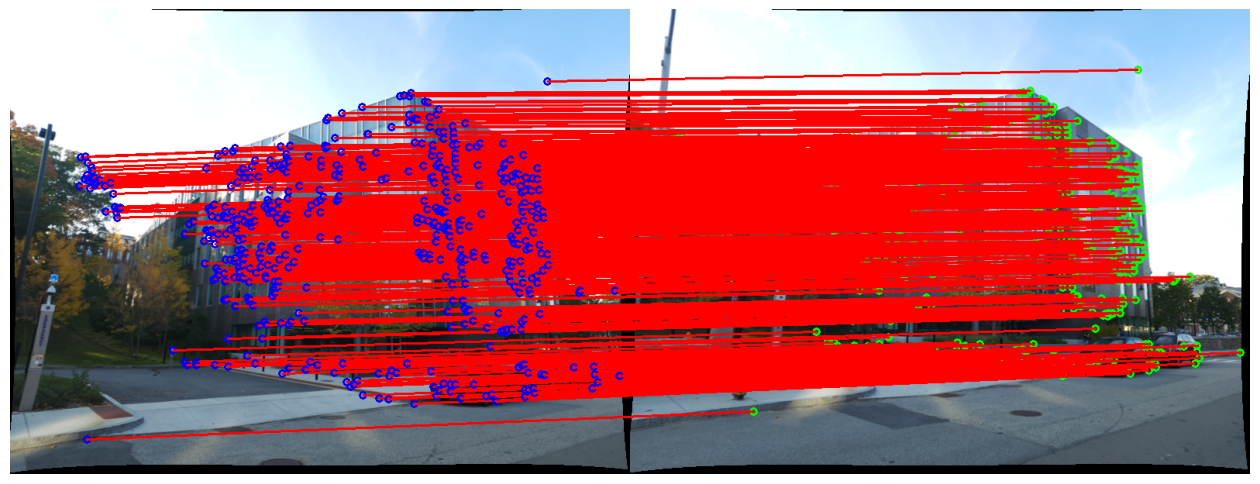

In [6]:
matchImage = drawMatchs(images[0], images[1], matchPairsInliers)

plt.figure(figsize=(16, 8))
plt.axis("off")
plt.imshow(matchImage)
plt.show()

## Final Fundimental Matrix Calculated from inliers

In [7]:
x1s = []
x2s = []
for idx in range(len(matchPairsInliers)):
    x1s.append(matchPairsInliers[idx].coords1)
    x2s.append(matchPairsInliers[idx].coords2)
x1s = np.array(x1s)
x2s = np.array(x2s)

Fest = EstimateFundamentalMatrix(x1s, x2s)
print(Fest)

[[-1.01560191e-08 -2.83182428e-05  1.22104597e-02]
 [ 3.08169578e-05  3.12999403e-06 -3.37417900e-02]
 [-1.40347513e-02  3.19257453e-02  9.98747299e-01]]


## Estimate Essential Matrix from Fundimental Matrix

In [8]:
Eest = EssentialFromFundamental(Fest, K)
print(Eest)

[[ 0.00281814 -0.56787478  0.12211619]
 [ 0.6222379   0.05389698 -0.76634905]
 [-0.1709061   0.8094526   0.02828009]]


## Estimate Camera Pose

In [9]:
Rest, Test = extractCameraPose(Eest)
print(Rest)
print(Test)

[array([[ 0.99666102,  0.02186308,  0.07866906],
       [-0.02579207,  0.99845199,  0.04927878],
       [-0.0774699 , -0.05114327,  0.99568207]]), array([[ 0.99666102,  0.02186308,  0.07866906],
       [-0.02579207,  0.99845199,  0.04927878],
       [-0.0774699 , -0.05114327,  0.99568207]]), array([[ 0.24703386,  0.20489049,  0.94709775],
       [ 0.2556057 , -0.95655179,  0.14026546],
       [ 0.93468711,  0.20743327, -0.28867186]]), array([[ 0.24703386,  0.20489049,  0.94709775],
       [ 0.2556057 , -0.95655179,  0.14026546],
       [ 0.93468711,  0.20743327, -0.28867186]])]
[array([-0.81400118, -0.15041355, -0.56105065]), array([0.81400118, 0.15041355, 0.56105065]), array([-0.81400118, -0.15041355, -0.56105065]), array([-0.81400118, -0.15041355, -0.56105065])]


## Triangulation Check for Cheirality Condition

In [10]:
Xest = []
for i in range(len(Rest)):
    X = LinearTriangulation(K, x1s, x2s, np.eye(3), np.zeros((3,1)), Rest[i], Test[i])
    Xest.append(X)

# Rest, Test, Xest = disambiguateCameraPose(Rest, Test, Xest)


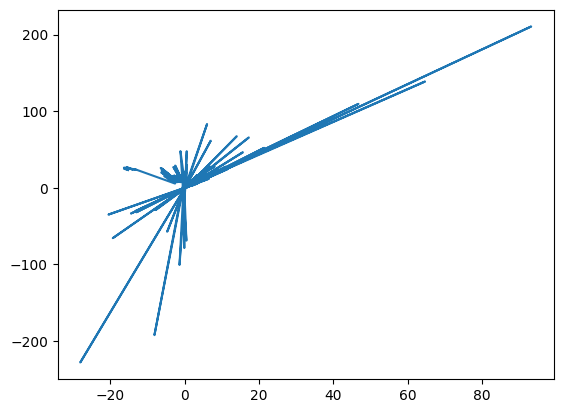

In [11]:
drawWorldPoints([Xest[0]])
drawWorldPoints([Xest[1]])
drawWorldPoints([Xest[2]])
drawWorldPoints([Xest[3]])